In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to load API

In [2]:
def load_api(brand_name, duration_time):
    url = f'https://iex.lewagon.com/stable/stock/{brand_name}/chart/{duration_time}'
    response = requests.get(url)
    data = response.json()
    return data

In [3]:
appl_3m = load_api(brand_name="aapl", duration_time="3m")

# Check the keys

In [6]:
for dictionary in appl_3m[0]:
    print(dictionary)

close
high
low
open
symbol
volume
id
key
subkey
date
updated
changeOverTime
marketChangeOverTime
uOpen
uClose
uHigh
uLow
uVolume
fOpen
fClose
fHigh
fLow
fVolume
label
change
changePercent


# Check the starting and the ending dates

In [7]:
appl_3m[0]["date"]

'2021-06-14'

In [10]:
appl_3m[62]["date"]

'2021-09-10'

# Create a DataFrame from those loaded datas

In [12]:
date = []
open_ = []
close = []
high = []
low = []

for dictionaries in appl_3m:
    date.append(dictionaries["date"])
    open_.append(dictionaries["open"])
    close.append(dictionaries["close"])
    high.append(dictionaries["high"])
    low.append(dictionaries["low"])

In [15]:
appl_3m_df = pd.DataFrame()
appl_3m_df["date"] = date
appl_3m_df["open"] = open_
appl_3m_df["close"] = close
appl_3m_df["high"] = high
appl_3m_df["low"] = low

In [16]:
appl_3m_df.head()

,date,open,close,high,low
0,2021-06-14,127.82,130.48,130.54,127.070
1,2021-06-15,129.94,129.64,130.60,129.390
2,2021-06-16,130.37,130.15,130.89,128.461
3,2021-06-17,129.80,131.79,132.55,129.650
4,2021-06-18,130.71,130.46,131.51,130.240


# Convert date to datetime dtype

In [17]:
appl_3m_df.dtypes

date      object
open     float64
close    float64
high     float64
low      float64
dtype: object

In [20]:
appl_3m_df["date"] = pd.to_datetime(appl_3m_df['date'], format='%Y-%m-%d')

In [21]:
appl_3m_df.dtypes

date     datetime64[ns]
open            float64
close           float64
high            float64
low             float64
dtype: object

# Plot the df

In [25]:
X = appl_3m_df["date"]
y = appl_3m_df.drop(columns="date")

Text(0.5, 1.0, 'titre test')

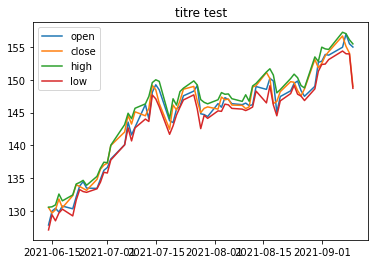

In [38]:
plt.plot(X, y, label=y.columns)
plt.legend()
plt.title('titre test')

# Compare GAFA since 3 years

In [39]:
def dataframe_from_loaded_api(brand_name, duration_time):
    """ Load datas from an API and generate a dataframe from them """
    # Load the datas
    url = f'https://iex.lewagon.com/stable/stock/{brand_name}/chart/{duration_time}'
    response = requests.get(url)
    data = response.json()
    
    # Generate a dataframe from json and define each column
    date = []
    open_ = []
    close = []
    high = []
    low = []

    for dictionaries in data:
        date.append(dictionaries["date"])
        open_.append(dictionaries["open"])
        close.append(dictionaries["close"])
        high.append(dictionaries["high"])
        low.append(dictionaries["low"])
    
    data_df = pd.DataFrame()
    data_df["date"] = date
    data_df["open"] = open_
    data_df["close"] = close
    data_df["high"] = high
    data_df["low"] = low
    
    # Convert the date column to datetime dtype
    data_df["date"] = pd.to_datetime(data_df['date'], format='%Y-%m-%d')
    
    return data_df

In [90]:
# google = dataframe_from_loaded_api(brand_name="googl" ,duration_time="")
amazon = dataframe_from_loaded_api(brand_name="amzn" ,duration_time="3m")
facebook = dataframe_from_loaded_api(brand_name="fb" ,duration_time="1d")
apple = dataframe_from_loaded_api(brand_name="aapl" ,duration_time="3m")
# microsoft = dataframe_from_loaded_api(brand_name="msft" ,duration_time="5d")

# Toutes les données ne sont pas disponibles. Soit le brand_name est inaccessible, soit la duration_time est limitée

Text(0.5, 1.0, 'Cours de bourse des 3 derniers mois pour Amazon et Apple')

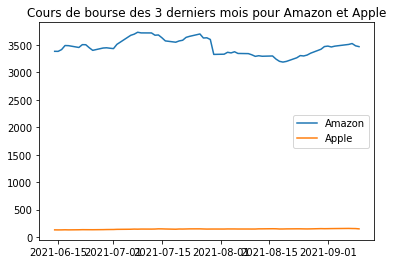

In [94]:
plt.plot(amazon["date"], amazon["close"], label="Amazon")
plt.plot(apple["date"], apple["close"], label="Apple")
plt.legend()
plt.title("Cours de bourse des 3 derniers mois pour Amazon et Apple")